### Data analysis for machine learning

In [24]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the data and understand the dataset

In [3]:
# Lodaing data
house_df = pd.read_csv("dataset/train.csv")

In [4]:
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
house_df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [6]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
# check the columns
house_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
house_df["PoolQC"].unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

<Axes: ylabel='Frequency'>

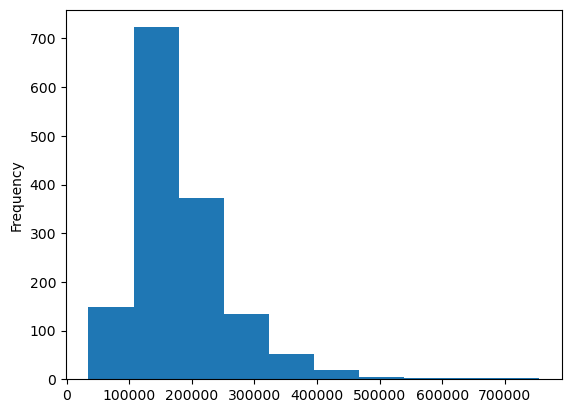

In [9]:
# see the distribution of saleprice
house_df["SalePrice"].plot.hist()

<Axes: xlabel='PoolQC'>

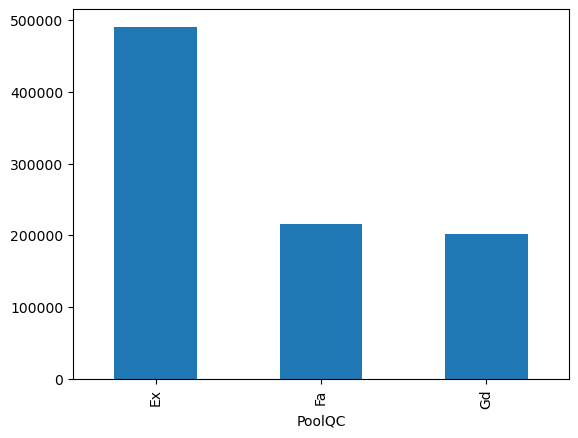

In [10]:
# Plot bar chart for poolQc vs avaerage saleprice
house_df.groupby("PoolQC")["SalePrice"].mean().plot.bar()

In [11]:
house_df["PoolQC"].value_counts()

PoolQC
Gd    3
Ex    2
Fa    2
Name: count, dtype: int64

In [12]:
house_df.drop(columns=["PoolQC"], inplace=True)

In [13]:
house_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,0,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,0,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,0,4,2010,WD,Normal,142125


In [14]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [15]:
house_df["Alley"].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [16]:
house_df["Alley"].value_counts()

Alley
Grvl    50
Pave    41
Name: count, dtype: int64

<Axes: xlabel='Alley'>

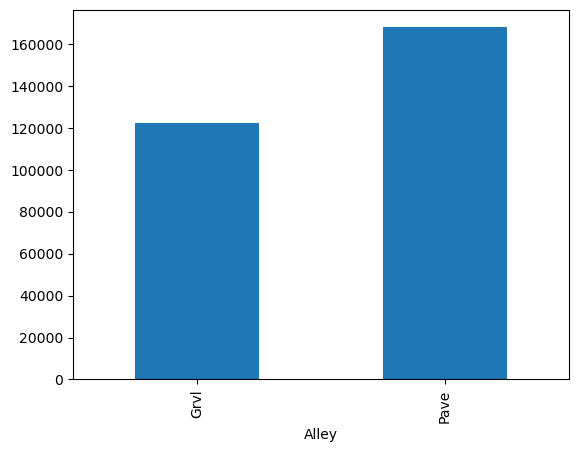

In [17]:
house_df.groupby("Alley")["SalePrice"].mean().plot.bar()

#### Finding important features/columns

In [18]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [19]:
# Check the number of numberic columns available in the dataset
len(house_df.select_dtypes(include=["int64","float64"]).columns)

38

In [21]:
numeric_columns = house_df.select_dtypes(include=["int64","float64"])
corr_matrix = numeric_columns.corr()
print(corr_matrix.shape)

(38, 38)


In [22]:
corr_matrix

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


<Axes: >

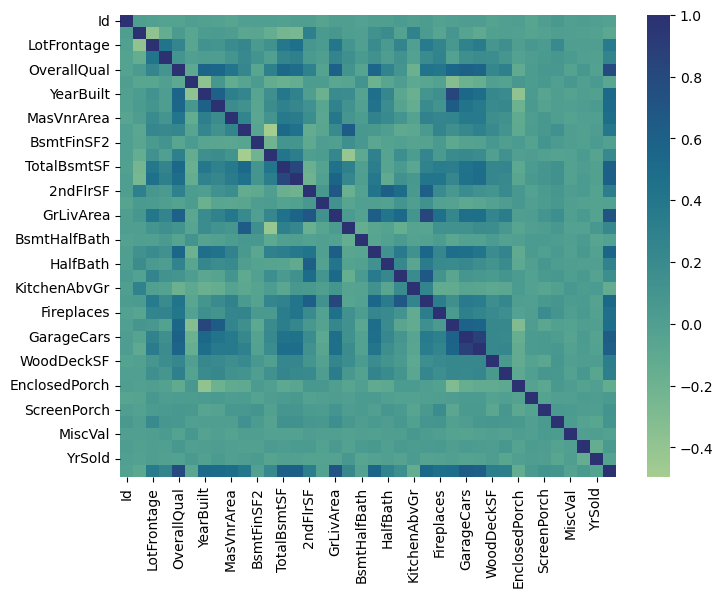

In [26]:
# PLot heatmap for the correlation matrix
fig = plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, cmap="crest")

In [29]:
# Select important columns
important_columns = ["MSSubClass", "LotFrontage", "OverallQual", "OverallCond", "YearBuilt", "MasVnrArea", "TotalBsmtSF", "1stFlrSF", "LowQualFinSF", "GrLivArea", "FullBath","SalePrice"]

In [28]:
# Select data of multiple columns
house_df[["FullBath","SalePrice"]]

,FullBath,SalePrice
0,2,208500
1,2,181500
2,2,223500
3,1,140000
4,2,250000
...,...,...
1455,2,175000
1456,2,210000
1457,2,266500
1458,1,142125


In [30]:
# Subset of the dataset for the training
training_data = house_df[important_columns]

In [31]:
training_data.head()

,MSSubClass,LotFrontage,OverallQual,OverallCond,YearBuilt,MasVnrArea,TotalBsmtSF,1stFlrSF,LowQualFinSF,GrLivArea,FullBath,SalePrice
0,60,65.0,7,5,2003,196.0,856,856,0,1710,2,208500
1,20,80.0,6,8,1976,0.0,1262,1262,0,1262,2,181500
2,60,68.0,7,5,2001,162.0,920,920,0,1786,2,223500
3,70,60.0,7,5,1915,0.0,756,961,0,1717,1,140000
4,60,84.0,8,5,2000,350.0,1145,1145,0,2198,2,250000


In [32]:
# Check the info of the subset
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1460 non-null   int64  
 1   LotFrontage   1201 non-null   float64
 2   OverallQual   1460 non-null   int64  
 3   OverallCond   1460 non-null   int64  
 4   YearBuilt     1460 non-null   int64  
 5   MasVnrArea    1452 non-null   float64
 6   TotalBsmtSF   1460 non-null   int64  
 7   1stFlrSF      1460 non-null   int64  
 8   LowQualFinSF  1460 non-null   int64  
 9   GrLivArea     1460 non-null   int64  
 10  FullBath      1460 non-null   int64  
 11  SalePrice     1460 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 137.0 KB


In [33]:
training_data.drop(columns=["LotFrontage", "MasVnrArea"], inplace=True)

C:\Users\bhawa\AppData\Local\Temp\ipykernel_1584\854932172.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data.drop(columns=["LotFrontage", "MasVnrArea"], inplace=True)


In [35]:
# Split the data into input(X) and output(target)(y)
X = training_data.drop(columns=["SalePrice"])
y = training_data["SalePrice"]

In [41]:
# split the data into training and testing set
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=50)

In [44]:
# Choose the algorithm
from sklearn.linear_model import LinearRegression


In [45]:
# Initilise the model with default parameter
LR = LinearRegression()

In [46]:
# Train the model
LR.fit(X_train, y_train)

LinearRegression()

#### Predict price for any two houses

In [48]:
# Predict sale price for any two house
any_two_house_input = X_test[2:4] 
any_two_house_input.head()

,MSSubClass,OverallQual,OverallCond,YearBuilt,TotalBsmtSF,1stFlrSF,LowQualFinSF,GrLivArea,FullBath
1291,160,5,7,1972,630,630,0,1302,2
1385,50,4,8,1922,796,796,0,1154,1


In [49]:
# select the actual price of these two house
real_prices = y_test[2:4]
print(real_prices)

1291    119500
1385    125500
Name: SalePrice, dtype: int64


In [50]:
# Predict the price of these two houses
predicted_prices = LR.predict(any_two_house_input)
print(predicted_prices)

[126369.09593772  96319.16941949]


#### Performance of the model

In [51]:
from sklearn.metrics import  mean_absolute_error, mean_absolute_percentage_error

In [52]:
# Prediction on the training data
pred_y_train = LR.predict(X_train)
# Prediction on the test data
pred_y_test  = LR.predict(X_test)

In [53]:
# Compare the real and the predicted values
list(zip(y_train, pred_y_train))

[(243000, 235878.21592160547),
 (125500, 89391.76437673299),
 (116900, 144098.35823807796),
 (131500, 93544.99257461983),
 (204900, 231523.24893780123),
 (104900, 109118.67066342477),
 (175000, 195034.62996562663),
 (83500, 78192.44660271169),
 (192500, 224785.42903585406),
 (318000, 274059.241031219),
 (124500, 163166.15952290315),
 (87000, 93958.1195736248),
 (124500, 105377.45360967075),
 (276000, 313854.201769131),
 (118500, 116198.64725688612),
 (179000, 214461.84668085957),
 (278000, 245363.6168880288),
 (112500, 115385.7342162286),
 (143000, 163563.1672388839),
 (248000, 277362.86180465575),
 (369900, 297001.8338470184),
 (165000, 175024.13490112522),
 (118000, 143067.60674447264),
 (220000, 241217.28241798212),
 (167500, 143521.06078301882),
 (145000, 171843.0648905891),
 (345000, 308261.5296891101),
 (167900, 175017.14964392572),
 (446261, 342983.008624939),
 (120000, 123278.00667069922),
 (312500, 277232.74575560144),
 (156500, 168521.76332523394),
 (174000, 174578.0134196397

In [55]:
print("mean absolute error in train data: ", mean_absolute_error(y_train, pred_y_train))
print("mean absolute error in test data: ", mean_absolute_error(y_test, pred_y_test))


mean absolute error in train data:  23960.84139802961
mean absolute error in test data:  23222.962934424504


In [56]:
# calculate the mean absolute percentage error
print("mean absolute % error in train data: ", mean_absolute_percentage_error(y_train, pred_y_train))
print("mean absolute % error in test data: ", mean_absolute_percentage_error(y_test, pred_y_test))

mean absolute % error in train data:  0.14338892726980942
mean absolute % error in test data:  0.1359154506846951


In [57]:
nums = [1,2,3,4,5,6,7,8,9,10]
for i in nums:
    print(2*i**2+i+1)

4
11
22
37
56
79
106
137
172
211
